In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%pip install yellowbrick
%pip install plotly==5.24.1

from sklearn.metrics import silhouette_score as ss
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

In [3]:
df = pd.read_csv("../dataset/house_features.csv")
df

Listing ID                  Address              Suburb  Postcode  \
0        REA6524  10/68 Kororoit Creek Rd  Williamstown North      3016   
1        REA9338      10/12 St Huberts Rd            Carnegie      3163   
2        REA8004           1/25 Morell St             Glenroy      3046   
3       REA28612              5/1 King St        Hampton East      3188   
4       REA18305           24 Crawford Av     Dandenong North      3175   
...          ...                      ...                 ...       ...   
33433    REA4622            18 Kanowna St             Hampton      3188   
33434    REA6595            14 Carlyle St       Hawthorn East      3123   
33435    REA8363         4a Hartington St                 Kew      3101   
33436   REA35554         25 Barrington Av                 Kew      3101   
33437    REA3193             11 Church St              Toorak      3142   

      PropType    Price Status  CBD Distance  Bedroom  Bathroom  Car-Garage  \
0            u   285000      S           8.9        1         1           1   
1            u   350000      S          11.4        1         1           1   
2            h   420000     PI          13.0        3         1           2   
3            u   491000      S          13.8        1         1           1   
4            h   614000      S          24.7        4         2           2   
...        ...      ...    ...           ...      ...       ...         ...   
33433        h  2130000      S          13.7        4         2           2   
33434        h  2354875      S           7.5        2         1           0   
33435        h  2652875      S           5.6        3         1           2   
33436        h  2652875      S           5.4        4         3           2   
33437        t  2700000     VB           4.6        3         2           2   

       Landsize  Building Area  Built Year                  RE Agency  
0           272     226.666667      2011.0                   Williams  
1           251     156.875000      1980.0              HockingStuart  
2           400     181.818182      1989.0                      Raine  
3           213     133.125000      2013.0                     Buxton  
4           680     323.809524      1980.0  First National & Partners  
...         ...            ...         ...                        ...  
33433       714     510.000000      1971.0              HockingStuart  
33434       541     386.428571      1984.0             Marshall White  
33435       554     240.869565      1991.0               Jellis Craig  
33436       737     307.083333      1995.0               Jellis Craig  
33437       294     183.750000      1972.0                        Kay  

[33438 rows x 15 columns]

In [4]:
df = df.drop(['Address', 'Listing ID', 'PropType'], axis=1)

In [5]:
suburb_encoder = LabelEncoder()
status_encoder = LabelEncoder()
re_agency_encoder = LabelEncoder()

In [9]:
df['Suburb'] = suburb_encoder.fit_transform(df['Suburb'])
df['Status'] = status_encoder.fit_transform(df['Status'])
df['RE Agency'] = re_agency_encoder.fit_transform(df['RE Agency'])

df['Price'] = np.log(df['Price'])

In [10]:
scaler = StandardScaler()

In [12]:
df[['CBD Distance', 'Bedroom', 'Bathroom', 'Car-Garage', 'Landsize', 'Building Area',  'Suburb', 'RE Agency', 'Status']] = scaler.fit_transform(df[['CBD Distance', 'Bedroom', 'Bathroom', 'Car-Garage', 'Landsize', 'Building Area',  'Suburb', 'RE Agency', 'Status']])

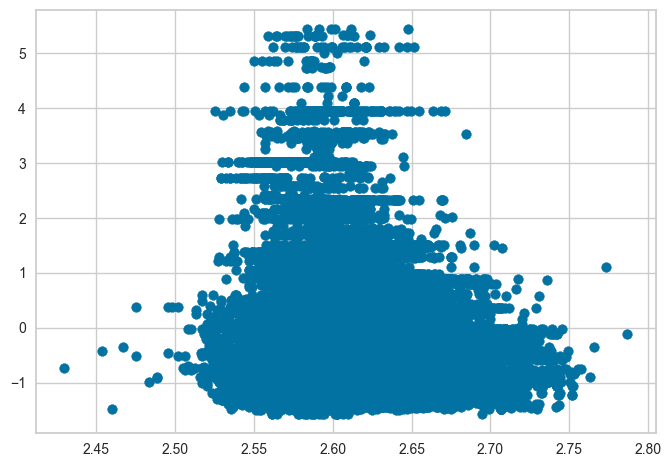

In [13]:

plt.scatter(x=df['Price'], y=df['CBD Distance'])
plt.show()

In [14]:
from sklearn.cluster import DBSCAN
price_cbd = df[['Price', 'CBD Distance']]
price, cbd_distance = df['Price'], df['CBD Distance']
X = price_cbd.to_numpy()

dbscan_cluster_model = DBSCAN(eps=0.2, min_samples=15).fit(X)
dbscan_cluster_model

DBSCAN(eps=0.2, min_samples=15)

In [15]:
df['cluster'] = dbscan_cluster_model.labels_

df

Suburb  Postcode     Price    Status  CBD Distance   Bedroom  \
0      1.691539      3016  2.530537 -0.357716     -0.358818 -1.891745   
1     -1.041014      3163  2.546761 -0.357716      0.010698 -1.891745   
2     -0.181915      3046  2.560942 -1.371775      0.247188  0.122398   
3     -0.109461      3188  2.572933 -0.357716      0.365434 -1.891745   
4     -0.678743      3175  2.589848 -0.357716      1.976524  1.129469   
...         ...       ...       ...       ...           ...       ...   
33433 -0.119812      3188  2.679077 -0.357716      0.350653  1.129469   
33434 -0.078410      3123  2.685941 -0.357716     -0.565747 -0.884674   
33435  0.159654      3101  2.694029 -0.357716     -0.846579  0.122398   
33436  0.159654      3101  2.694029 -0.357716     -0.876141  1.129469   
33437  1.422424      3142  2.695219  2.177429     -0.994386  0.122398   

       Bathroom  Car-Garage  Landsize  Building Area  Built Year  RE Agency  \
0     -0.871265   -0.676632 -1.161221      -0.501362      2011.0   2.040594   
1     -0.871265   -0.676632 -1.283947      -1.157424      1980.0  -0.337542   
2     -0.871265    0.364805 -0.413176      -0.922951      1989.0   1.144645   
3     -0.871265   -0.676632 -1.506023      -1.380681      2013.0  -1.156063   
4      0.453641    0.364805  1.223174       0.411808      1980.0  -0.625130   
...         ...         ...       ...            ...         ...        ...   
33433  0.453641    0.364805  1.421874       2.162052      1971.0  -0.337542   
33434 -0.871265   -1.718069  0.410843       1.000445      1984.0   0.292941   
33435 -0.871265    0.364805  0.486817      -0.367851      1991.0  -0.182686   
33436  1.778547    0.364805  1.556288       0.254577      1995.0  -0.182686   
33437  0.453641    0.364805 -1.032651      -0.904791      1972.0  -0.072075   

       cluster  
0            0  
1            0  
2            0  
3            0  
4            0  
...        ...  
33433        0  
33434        0  
33435        0  
33436        0  
33437        0  

[33438 rows x 13 columns]

In [16]:
df['cluster'].value_counts()


cluster
0    33114
1      225
3       66
2       33
Name: count, dtype: int64

In [17]:
import plotly.express as px
fig = px.scatter(x=price, y=cbd_distance, color=df['cluster'])
fig.show()

In [18]:
ss(X, df['cluster'])

np.float64(0.7149663436648217)

In [19]:
epsilons = np.linspace(0.01, 1, num=15)
epsilons

array([0.01      , 0.08071429, 0.15142857, 0.22214286, 0.29285714,
       0.36357143, 0.43428571, 0.505     , 0.57571429, 0.64642857,
       0.71714286, 0.78785714, 0.85857143, 0.92928571, 1.        ])

In [20]:
min_samples = np.arange(2, 20, step=3)
min_samples

array([ 2,  5,  8, 11, 14, 17])

In [21]:
import itertools

combinations = list(itertools.product(epsilons, min_samples))
combinations

[(np.float64(0.01), np.int64(2)),
 (np.float64(0.01), np.int64(5)),
 (np.float64(0.01), np.int64(8)),
 (np.float64(0.01), np.int64(11)),
 (np.float64(0.01), np.int64(14)),
 (np.float64(0.01), np.int64(17)),
 (np.float64(0.08071428571428571), np.int64(2)),
 (np.float64(0.08071428571428571), np.int64(5)),
 (np.float64(0.08071428571428571), np.int64(8)),
 (np.float64(0.08071428571428571), np.int64(11)),
 (np.float64(0.08071428571428571), np.int64(14)),
 (np.float64(0.08071428571428571), np.int64(17)),
 (np.float64(0.15142857142857144), np.int64(2)),
 (np.float64(0.15142857142857144), np.int64(5)),
 (np.float64(0.15142857142857144), np.int64(8)),
 (np.float64(0.15142857142857144), np.int64(11)),
 (np.float64(0.15142857142857144), np.int64(14)),
 (np.float64(0.15142857142857144), np.int64(17)),
 (np.float64(0.22214285714285714), np.int64(2)),
 (np.float64(0.22214285714285714), np.int64(5)),
 (np.float64(0.22214285714285714), np.int64(8)),
 (np.float64(0.22214285714285714), np.int64(11)),
 (

In [22]:
N = len(combinations)
N

90

In [23]:
def get_scores_and_labels(combinations, X):
  scores = []
  all_labels_list = []

  for i, (eps, num_samples) in enumerate(combinations):
    dbscan_cluster_model = DBSCAN(eps=eps, min_samples=num_samples).fit(X)
    labels = dbscan_cluster_model.labels_
    labels_set = set(labels)
    num_clusters = len(labels_set)
    if -1 in labels_set:
      num_clusters -= 1

    if (num_clusters < 2) or (num_clusters > 50):
      scores.append(-10)
      all_labels_list.append('bad')
      c = (eps, num_samples)
      print(f"Combination {c} on iteration {i+1} of {N} has {num_clusters} clusters. Moving on")
      continue

    scores.append(ss(X, labels))
    all_labels_list.append(labels)
    print(f"Index: {i}, Score: {scores[-1]}, Labels: {all_labels_list[-1]}, NumClusters: {num_clusters}")

  best_index = np.argmax(scores)
  best_parameters = combinations[best_index]
  best_labels = all_labels_list[best_index]
  best_score = scores[best_index]

  return {'best_epsilon': best_parameters[0],
          'best_min_samples': best_parameters[1],
          'best_labels': best_labels,
          'best_score': best_score}

best_dict = get_scores_and_labels(combinations, X)

Combination (np.float64(0.01), np.int64(2)) on iteration 1 of 90 has 322 clusters. Moving on
Combination (np.float64(0.01), np.int64(5)) on iteration 2 of 90 has 226 clusters. Moving on
Combination (np.float64(0.01), np.int64(8)) on iteration 3 of 90 has 202 clusters. Moving on
Combination (np.float64(0.01), np.int64(11)) on iteration 4 of 90 has 196 clusters. Moving on
Combination (np.float64(0.01), np.int64(14)) on iteration 5 of 90 has 198 clusters. Moving on
Combination (np.float64(0.01), np.int64(17)) on iteration 6 of 90 has 191 clusters. Moving on
Index: 6, Score: 0.41012820003289563, Labels: [0 0 0 ... 0 0 0], NumClusters: 18
Index: 7, Score: 0.5166735688982182, Labels: [0 0 0 ... 0 0 0], NumClusters: 16
Index: 8, Score: 0.5162175356829979, Labels: [0 0 0 ... 0 0 0], NumClusters: 14
Index: 9, Score: 0.5174989100021478, Labels: [0 0 0 ... 0 0 0], NumClusters: 13
Index: 10, Score: 0.5169644786845918, Labels: [0 0 0 ... 0 0 0], NumClusters: 12
Index: 11, Score: 0.5169644786845918,

In [25]:
best_dict

{'best_epsilon': np.float64(0.22214285714285714),
 'best_min_samples': np.int64(2),
 'best_labels': array([0, 0, 0, ..., 0, 0, 0]),
 'best_score': np.float64(0.7702511919660912)}

In [26]:
df['cluster'] = best_dict['best_labels']

df['cluster'].value_counts()

cluster
0    33339
1       99
Name: count, dtype: int64

In [27]:
fig = px.scatter(x=price, y=cbd_distance, color=df['cluster'])
fig.show()

In [28]:
labels = dbscan_cluster_model.fit_predict(X)
db_score = davies_bouldin_score(X, labels)
print(f'Davies-Bouldin Index: {db_score}')


Davies-Bouldin Index: 0.35479724279554326


In [29]:
score = calinski_harabasz_score(X, labels)
print(f'Calinski-Harabasz Index: {score}')

Calinski-Harabasz Index: 2517.85998547597
